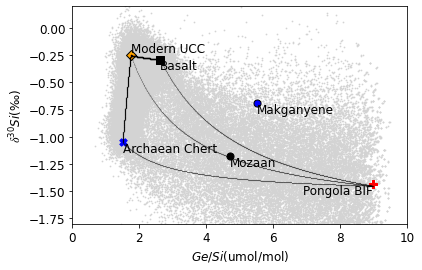

In [2]:
import pandas as pd
import numpy as np
# Our diamictite data
Mozaan_Si_Iso = -1.18
Mozaan_GeSilica =  4.71
Makganyene_Si_Iso = -0.69
Makganyene_GeSilica = 5.51

# Savage et al., 2014
Basalt_Si_Iso = [np.random.normal(loc=-0.29, scale=0.07, size=10000)]
Basalt_Si_Iso_sd = np.std(a=Basalt_Si_Iso)
Basalt_Si_Iso_avg = np.mean(a=Basalt_Si_Iso)

# Delvigne et al., 2012
Basalt_GeSilica = [np.random.normal(loc=2.62, scale=.25, size=10000)]
Basalt_GeSilica_sd = np.std(a= Basalt_GeSilica)
Basalt_GeSilica_avg = np.mean(a=Basalt_GeSilica)

# Rudnick and Gao, 2014
UCC_GeSilica = [np.random.normal(loc=1.74, scale=.25, size=10000)]
UCC_GeSilica_sd = np.std(a= UCC_GeSilica)
UCC_GeSilica_avg = np.mean(a= UCC_GeSilica)
# Savage et al., 2013
UCC_Si_Iso = [np.random.normal(loc=-0.25, scale=0.16, size=10000)]
UCC_Si_Iso_sd = np.std(a= UCC_Si_Iso)
UCC_Si_Iso_avg = np.mean(a= UCC_Si_Iso)

# Pongola BIF isotope source: Delvigne et al., 2012
BIF_Si_Iso = [np.random.normal(loc=-1.4499, scale=0.4592, size=10000)]
BIF_Si_Iso_sd = np.std(a= BIF_Si_Iso)
BIF_Si_Iso_avg = np.mean(a= BIF_Si_Iso)

# Average Precambrian BIF Ge/silica source: Delvigne et al., 2012
BIF_GeSilica = [np.random.normal (loc=8.9788, scale=.25, size=10000)]
BIF_GeSilica_sd = np.std(a= BIF_GeSilica)
BIF_GeSilica_avg = np.mean(a= BIF_GeSilica)

# Archaean chert isotope sources: Van den Boorn et al., 2007 and 2010, Steinhoefel et al., 2009, Chakrabarti et al., 2012, Delvigne et al., 2012
Chert_Si_Iso = [np.random.normal(loc=-1.051, scale=.086, size=10000)]
Chert_Si_Iso_sd = np.std(a= Chert_Si_Iso)
Chert_Si_Iso_avg = np.mean(a= Chert_Si_Iso)

# Archaean chert Ge/silica sources:Dong et al., 2015
Chert_GeSilica = [np.random.normal(loc=1.5, scale=.25, size=10000)]
Chert_GeSilica_sd = np.std(a= Chert_GeSilica)
Chert_GeSilica_avg = np.mean(a= Chert_GeSilica)

f_b_values = np.linspace(0, 1, 10000, dtype=float)
f_a_values = np.linspace (1, 0, 10000, dtype=float)

#UCC and Basalt mixing line
UCC_GeSi_fa = np.multiply(UCC_GeSilica,f_a_values)
UCC_GeSi_fa = UCC_GeSi_fa.T
Basalt_GeSi_fb = np.multiply(Basalt_GeSilica,f_b_values)
Basalt_GeSi_fb = Basalt_GeSi_fb.T
data = pd.DataFrame(f_a_values)
data['UCC GeSi fa'] = UCC_GeSi_fa
data['Bas GeSi fb']= Basalt_GeSi_fb
data["UB X mix value"] = data['UCC GeSi fa'] + data['Bas GeSi fb']
UCC_Iso_fa = np.multiply(UCC_Si_Iso,f_a_values)
UCC_Iso_fa = UCC_Iso_fa.T
Basalt_Iso_fb = np.multiply(Basalt_Si_Iso,f_b_values)
Basalt_Iso_fb = Basalt_Iso_fb.T
data['UCC Iso fa'] = UCC_Iso_fa
data['Bas Iso fb']= Basalt_Iso_fb
UCC_GeSi = np.array(UCC_GeSilica)
UCC_GeSi = UCC_GeSi.T
Bas_GeSi = np.array(Basalt_GeSilica)
Bas_GeSi = Bas_GeSi.T
data['UCC GeSilica']= UCC_GeSi
data['Bas GeSilica']= Bas_GeSi
data['UCC GeSi div X']= data['UCC GeSilica']/data['UB X mix value']
data['Bas GeSi div X']= data['Bas GeSilica']/data['UB X mix value']
data['UB Y mix value']= data['UCC Iso fa']*data['UCC GeSi div X']+data['Bas Iso fb']*data['Bas GeSi div X']


# UCC and Chert mixing line
Chert_GeSi_fb = np.multiply(Chert_GeSilica,f_b_values)
Chert_GeSi_fb = Chert_GeSi_fb.T
UCC_GeSi_fa = np.multiply(UCC_GeSilica,f_a_values)
UCC_GeSi_fa = UCC_GeSi_fa.T
data2 = pd.DataFrame(f_a_values)
data2['Chert GeSi fb'] = Chert_GeSi_fb
data2['UCC GeSi fa']= UCC_GeSi_fa
data2["UC X mix value"] = data2['Chert GeSi fb'] + data2['UCC GeSi fa']
Chert_Iso_fb = np.multiply(Chert_Si_Iso,f_b_values)
Chert_Iso_fb = Chert_Iso_fb.T
UCC_Iso_fa = np.multiply(UCC_Si_Iso,f_a_values)
UCC_Iso_fa = UCC_Iso_fa.T
data2['Chert Iso fb'] = Chert_Iso_fb
data2['UCC Iso fa']= UCC_Iso_fa
Chert_GeSi = np.array(Chert_GeSilica)
Chert_GeSi = Chert_GeSi.T
data2['Chert GeSilica']= Chert_GeSi
data2['Chert GeSi div X']= data2['Chert GeSilica']/data2["UC X mix value"]
data2['UCC GeSi div X 2']= data['UCC GeSilica']/data2["UC X mix value"]
data2['UC Y mix value']= data2['Chert Iso fb']*data2['Chert GeSi div X']+data2['UCC Iso fa']*data2['UCC GeSi div X 2']

# BIF and Chert mixing line
BIF_GeSi_fb = np.multiply(BIF_GeSilica,f_b_values)
BIF_GeSi_fb = BIF_GeSi_fb.T
Chert_GeSi_fa = np.multiply(Chert_GeSilica,f_a_values)
Chert_GeSi_fa = Chert_GeSi_fa.T
data3 = pd.DataFrame(f_a_values)
data3['BIF GeSi fb'] = BIF_GeSi_fb
data3['Chert GeSi fa']= Chert_GeSi_fa
data3["BC X mix value"] = data3['BIF GeSi fb'] + data3['Chert GeSi fa']
BIF_Iso_fb = np.multiply(BIF_Si_Iso,f_b_values)
BIF_Iso_fb = BIF_Iso_fb.T
Chert_Iso_fa = np.multiply(Chert_Si_Iso,f_a_values)
Chert_Iso_fa = Chert_Iso_fa.T
data3['BIF Iso fb'] = BIF_Iso_fb
data3['Chert Iso fa']= Chert_Iso_fa
BIF_GeSi = np.array(BIF_GeSilica)
BIF_GeSi = BIF_GeSi.T
data3['BIF GeSilica']= BIF_GeSi
data3['BIF GeSi div X']= data3['BIF GeSilica']/data3["BC X mix value"]
data3['Chert GeSi div X 2']= data2['Chert GeSilica']/data3["BC X mix value"]
data3['BC Y mix value']= data3['BIF Iso fb']*data3['BIF GeSi div X']+data3['Chert Iso fa']*data3['Chert GeSi div X 2']

# Basalt and BIF mixing line
Basalt_GeSi_fa = np.multiply(Basalt_GeSilica,f_a_values)
Basalt_GeSi_fa = Basalt_GeSi_fa.T
BIF_GeSi_fb = np.multiply(BIF_GeSilica,f_b_values)
BIF_GeSi_fb = BIF_GeSi_fb.T
data4 = pd.DataFrame(f_a_values)
data4['Bas GeSi fa'] = Basalt_GeSi_fa
data4['BIF GeSi fb']= BIF_GeSi_fb
data4["BB X mix value"] = data4['Bas GeSi fa'] + data4['BIF GeSi fb']
Bas_Iso_fa = np.multiply(Basalt_Si_Iso,f_a_values)
Bas_Iso_fa = Bas_Iso_fa.T
BIF_Iso_fb = np.multiply(BIF_Si_Iso,f_b_values)
BIF_Iso_fb = BIF_Iso_fb.T
data4['Bas Iso fa'] = Bas_Iso_fa
data4['BIF Iso fb']= BIF_Iso_fb
data4['Bas GeSi div X']= data['Bas GeSilica']/data4["BB X mix value"]
data4['BIF GeSi div X']= data3['BIF GeSilica']/data4["BB X mix value"]
data4['BB Y mix value']= data4['Bas Iso fa']*data4['Bas GeSi div X']+data4['BIF Iso fb']*data4['BIF GeSi div X']

# Chert and Basalt mixing line
Chert_GeSi_fa = np.multiply(Chert_GeSilica,f_a_values)
Chert_GeSi_fa = Chert_GeSi_fa.T
Basalt_GeSi_fb = np.multiply(Basalt_GeSilica,f_b_values)
Basalt_GeSi_fb = Basalt_GeSi_fb.T
data6 = pd.DataFrame(f_a_values)
data6['Chert GeSi fa'] = Chert_GeSi_fa
data6['Bas GeSi fb']= Basalt_GeSi_fb
data6["CB X mix value"] = data6['Chert GeSi fa'] + data6['Bas GeSi fb']
Chert_Iso_fa = np.multiply(Chert_Si_Iso,f_a_values)
Chert_Iso_fa = Chert_Iso_fa.T
Basalt_Iso_fb = np.multiply(Basalt_Si_Iso,f_b_values)
Basalt_Iso_fb = Basalt_Iso_fb.T
data6['Chert Iso fa'] = Chert_Iso_fa
data6['Bas Iso fb']= Basalt_Iso_fb
Chert_GeSi = np.array(Chert_GeSilica)
Chert_GeSi = Chert_GeSi.T
Bas_GeSilica = np.full((10000), 50, dtype=float)
data6['Chert GeSilica']= Chert_GeSi
data6['Chert GeSi div X']= data6['Chert GeSilica']/data6['CB X mix value']
data6['Bas GeSi div X']= data['Bas GeSilica']/data6['CB X mix value']
data6['CB Y mix value']= data6['Chert Iso fa']*data6['Chert GeSi div X']+data6['Bas Iso fb']*data6['Bas GeSi div X']

# BIF and UCC mixing line
UCC_GeSi_fa = np.multiply(UCC_GeSilica,f_a_values)
UCC_GeSi_fa = UCC_GeSi_fa.T
data5 = pd.DataFrame(f_a_values)
data5['UCC GeSi fa'] = UCC_GeSi_fa
data5['BIF GeSi fb']= BIF_GeSi_fb
data5['BU X mix value'] = data5['UCC GeSi fa'] + data5['BIF GeSi fb']
data5['UCC Iso fa'] = UCC_Iso_fa
data5['BIF Iso fb']= BIF_Iso_fb
data5['UCC GeSi div X']= data['UCC GeSilica']/data5['BU X mix value']
data5['BIF GeSi div X']= data3['BIF GeSilica']/data5['BU X mix value']
data5['BU Y mix value']= data5['UCC Iso fa']*data5['UCC GeSi div X']+data5['BIF Iso fb']*data5['BIF GeSi div X']

trendline_data = pd.read_excel('GeSi mixing trendline.xlsx')


import matplotlib.pyplot as plt
x = ([data['UB X mix value']])
y = ([data['UB Y mix value']])
plt.scatter(x,y, s=.5, c="lightgrey")
x2= (data2['UC X mix value'])
y2= (data2['UC Y mix value'])
plt.scatter(x2,y2, s=.5, c="lightgrey")
x3= (data3['BC X mix value'])
y3= (data3['BC Y mix value'])
plt.scatter(x3,y3, s=.5, c="lightgrey")
x4 = (data4['BB X mix value'])
y4 = (data4['BB Y mix value'])
plt.scatter(x4,y4, s=.5, c="lightgrey")
x5 = (data5['BU X mix value'])
y5 = (data5['BU Y mix value'])
plt.scatter(x5,y5, s=.5, c="lightgrey")
x6 = (data6['CB X mix value'])
y6 = (data6['CB Y mix value'])
plt.scatter(x6,y6, s=.5, c="lightgrey")
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([-1.8, 0.2])
axes.set_xlabel('$Ge/Si$(umol/mol)')
axes.set_ylabel('$𝛿^{30}Si(‰)$')

plt.rcParams.update({'font.size': 12})

UCC_x = UCC_GeSilica_avg
UCC_y = UCC_Si_Iso_avg
plt.scatter(UCC_x,UCC_y,s=50, c="orange", edgecolor='black', marker="D")
plt.text(UCC_x,UCC_y,'Modern UCC', ha='left', va='bottom')
BIF_x = BIF_GeSilica_avg
BIF_y = BIF_Si_Iso_avg
plt.scatter(BIF_x,BIF_y,s=55, c="red",marker="P")
plt.text(BIF_x,BIF_y,'Pongola BIF', ha='right', va='top')
Chert_x = Chert_GeSilica_avg
Chert_y = Chert_Si_Iso_avg
plt.scatter(Chert_x,Chert_y,s=55, c="blue", marker="X")
plt.text(Chert_x,Chert_y,'Archaean Chert', va='top', ha='left')
Basalt_x = Basalt_GeSilica_avg
Basalt_y = Basalt_Si_Iso_avg
plt.scatter(Basalt_x,Basalt_y,s=50, c="black", marker="s")
plt.text(Basalt_x,Basalt_y,'Basalt', va='top', ha='left')

#plt.plot([Basalt_x,UCC_x],[Basalt_y,UCC_y],c="black", linewidth=.5)
#plt.plot([Basalt_x,BIF_x],[Basalt_y,BIF_y],c="black", linewidth=.5)
#plt.plot([Chert_x,UCC_x],[Chert_y, UCC_y],c="black", linewidth=.5)
#plt.plot([Chert_x,BIF_x],[Chert_y,BIF_y],c="black", linewidth=.5)
#plt.plot([BIF_x,UCC_x],[BIF_y,UCC_y],c="black", linewidth=.5)

Mozaan_x = Mozaan_GeSilica
Mozaan_y = Mozaan_Si_Iso
Makganyene_x=Makganyene_GeSilica
Makganyene_y= Makganyene_Si_Iso
plt.scatter([Makganyene_x], [Makganyene_y],s=50, c="blue", edgecolor='black')
plt.scatter([Mozaan_x],[Mozaan_y],s=50, c="black", edgecolor='black')
plt.text(Mozaan_x,Mozaan_y,'Mozaan', ha='left', va='top')
plt.text(Makganyene_x,Makganyene_y,'Makganyene', ha='left', va='top')
plt.scatter([trendline_data['UCx'],trendline_data['UBx'],trendline_data['BUx'],trendline_data['BBx'], trendline_data['BCx']],[trendline_data['UCy'],trendline_data['UBy'],trendline_data['BUy'],trendline_data['BBy'], trendline_data['BCy']], s=0.015, c="black", marker='.')
plt.savefig('GeSimixingplot.png', dpi=300, bbox_inches='tight')
plt.show()